In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

## KMeans

In [2]:
df = pd.read_csv("original.csv")

In [3]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.index = df.iloc[:,0]
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [5]:
df1 = df.iloc[:,1:5]
df1.head(5)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df1.index.name = None
df1.head(4)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [7]:
x = df1.iloc[:,[0,1]].values

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


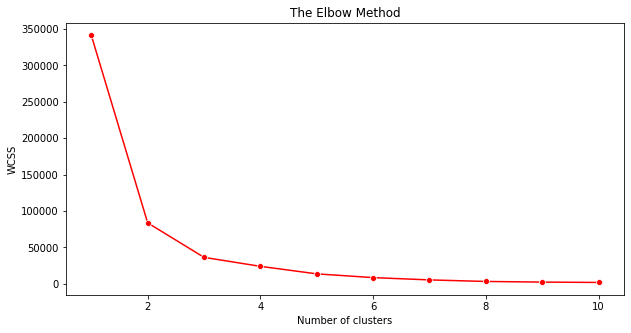

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
k_means = KMeans(n_clusters=3,init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(x)

In [11]:
pd.DataFrame({"eyaletler":df1.index,"Kumeler":y_kmeans})[0:10]

,eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


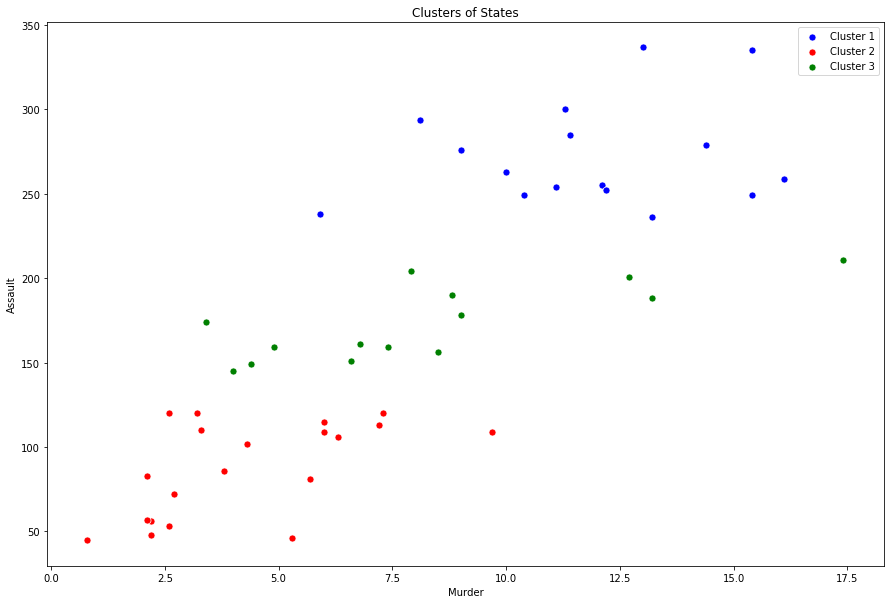

In [14]:
plt.figure(figsize=(15,10));
sns.scatterplot(x[y_kmeans == 0 ,0] , x[y_kmeans == 0 , 1],color = "blue", label="Cluster 1", s=50)
sns.scatterplot(x[y_kmeans == 1 ,0] , x[y_kmeans == 1 , 1],color = "red", label="Cluster 2", s=50)
sns.scatterplot(x[y_kmeans == 2 ,0] , x[y_kmeans == 2 , 1],color = "green", label="Cluster 3", s=50)
plt.grid(False)
plt.title('Clusters of States')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()


In [15]:
from yellowbrick.cluster import KElbowVisualizer

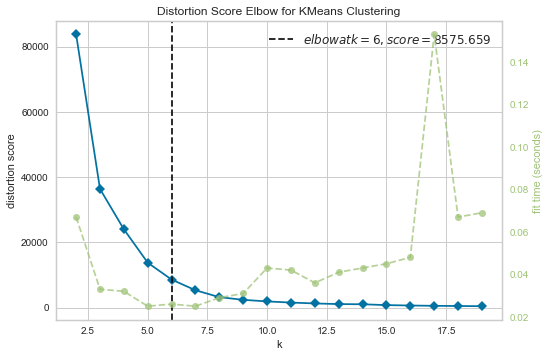

In [16]:
km = KMeans()
visualizer = KElbowVisualizer(km, k = (2,20))
visualizer.fit(x)
visualizer.poof()